# Exercise
Apply MLP on MNIST dataset

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = np.array(mnist.data.astype('float32'))
y = np.array(mnist.target.astype('int'))


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
# Normalize pixel values to be between 0 and 1
X /= 255.0

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.51637298
Iteration 2, loss = 0.76393980
Iteration 3, loss = 0.56594662
Iteration 4, loss = 0.48207965
Iteration 5, loss = 0.43444520
Iteration 6, loss = 0.40343211
Iteration 7, loss = 0.38106317
Iteration 8, loss = 0.36392374
Iteration 9, loss = 0.34989386
Iteration 10, loss = 0.33822265


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=1, solver='sgd', verbose=10)

In [25]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

In [26]:

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1=f1_score(y_test, y_pred, average = None)
print(f"f1 score: {f1}" )

Accuracy: 0.9075714285714286
f1 score: [0.9581946  0.94943304 0.88601992 0.8852459  0.9065955  0.87544767
 0.9321075  0.91947878 0.86891386 0.88299753]


In [27]:
# Save the model
import pickle
with open('data/mnistmodel1.pkl', 'wb') as wm:
    pickle.dump(mlp, wm)



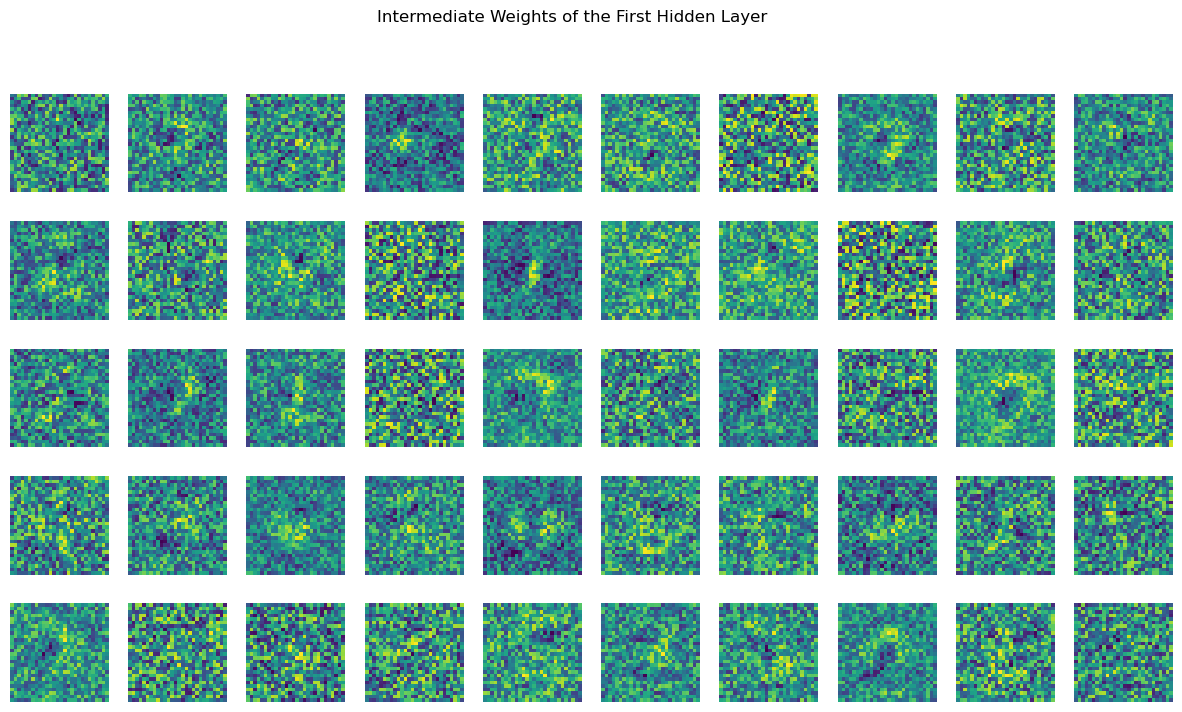

In [28]:
import matplotlib.pyplot as plt
# Extract intermediate weights from the first hidden layer
intermediate_weights = mlp.coefs_[0]

# Plot the intermediate weights
fig, axes = plt.subplots(5, 10, figsize=(15, 8))
fig.suptitle('Intermediate Weights of the First Hidden Layer')

for i, ax in enumerate(axes.flat):
    ax.imshow(intermediate_weights[:, i].reshape(28, 28), cmap='viridis')
    ax.axis('off')

plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1295,    0,    7,    2,    2,   10,   13,    1,   12,    1],
       [   0, 1549,    3,   16,    2,    8,    2,    5,   14,    1],
       [   8,   22, 1201,   18,   26,    5,   32,   24,   37,    7],
       [   6,    7,   31, 1269,    0,   48,   14,   19,   24,   15],
       [   3,    4,   11,    3, 1189,    0,   14,    4,    8,   59],
       [  15,   12,    7,   52,   14, 1100,   21,    6,   34,   12],
       [   5,    7,   16,    3,   19,   20, 1318,    0,    7,    1],
       [  11,   21,   26,    5,   14,    4,    0, 1376,    2,   44],
       [   9,   28,   18,   51,    9,   34,   18,   10, 1160,   20],
       [   8,   13,   11,   15,   53,   11,    0,   45,   15, 1249]],
      dtype=int64)

# Exercise
Apply MLP and single perceptron on IRIS dataset. Report results.

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Iteration 1, loss = 1.63323784
Iteration 2, loss = 1.59934475
Iteration 3, loss = 1.55375670
Iteration 4, loss = 1.50034921
Iteration 5, loss = 1.44307958
Iteration 6, loss = 1.38611056
Iteration 7, loss = 1.33296405
Iteration 8, loss = 1.28636681
Iteration 9, loss = 1.24816613
Iteration 10, loss = 1.21873051
Iteration 11, loss = 1.19702039
Iteration 12, loss = 1.18106292
Iteration 13, loss = 1.16833713
Iteration 14, loss = 1.15649150
Iteration 15, loss = 1.14374020
Iteration 16, loss = 1.12924953
Iteration 17, loss = 1.11255715
Iteration 18, loss = 1.09370801
Iteration 19, loss = 1.07319067
Iteration 20, loss = 1.05197851
Iteration 21, loss = 1.03102617
Iteration 22, loss = 1.01117000
Iteration 23, loss = 0.99298197
Iteration 24, loss = 0.97653971
Iteration 25, loss = 0.96179876
Iteration 26, loss = 0.94851785
Iteration 27, loss = 0.93642371
Iteration 28, loss = 0.92525504
Iteration 29, loss = 0.91467503
Iteration 30, loss = 0.90452958
Iteration 31, loss = 0.89478324
Iteration 32, los

Iteration 640, loss = 0.23197073
Iteration 641, loss = 0.23169550
Iteration 642, loss = 0.23142086
Iteration 643, loss = 0.23114683
Iteration 644, loss = 0.23087343
Iteration 645, loss = 0.23060064
Iteration 646, loss = 0.23032843
Iteration 647, loss = 0.23005689
Iteration 648, loss = 0.22978586
Iteration 649, loss = 0.22951549
Iteration 650, loss = 0.22924568
Iteration 651, loss = 0.22897646
Iteration 652, loss = 0.22870786
Iteration 653, loss = 0.22843978
Iteration 654, loss = 0.22817235
Iteration 655, loss = 0.22790542
Iteration 656, loss = 0.22763913
Iteration 657, loss = 0.22737337
Iteration 658, loss = 0.22710819
Iteration 659, loss = 0.22684364
Iteration 660, loss = 0.22657957
Iteration 661, loss = 0.22631611
Iteration 662, loss = 0.22605319
Iteration 663, loss = 0.22579087
Iteration 664, loss = 0.22552908
Iteration 665, loss = 0.22526785
Iteration 666, loss = 0.22500714
Iteration 667, loss = 0.22474699
Iteration 668, loss = 0.22448745
Iteration 669, loss = 0.22422841
Iteration 

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Exercise
Apply MLP and single perceptron on breast cancer dataset dataset. Report results.

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Iteration 1, loss = 19.00636708
Iteration 2, loss = 5.58720112
Iteration 3, loss = 0.80850914
Iteration 4, loss = 0.70914820
Iteration 5, loss = 0.70698917
Iteration 6, loss = 0.70339569
Iteration 7, loss = 0.68807637
Iteration 8, loss = 0.61752086
Iteration 9, loss = 0.61351927
Iteration 10, loss = 0.59312176
Iteration 11, loss = 0.59177293
Iteration 12, loss = 0.60476894
Iteration 13, loss = 0.57384670
Iteration 14, loss = 0.57244430
Iteration 15, loss = 0.56585831
Iteration 16, loss = 0.57021030
Iteration 17, loss = 0.55741961
Iteration 18, loss = 0.55692934
Iteration 19, loss = 0.55757125
Iteration 20, loss = 0.55943621
Iteration 21, loss = 0.54833509
Iteration 22, loss = 0.54981273
Iteration 23, loss = 0.53873532
Iteration 24, loss = 0.55202344
Iteration 25, loss = 0.54924608
Iteration 26, loss = 0.54810841
Iteration 27, loss = 0.52779597
Iteration 28, loss = 0.56276595
Iteration 29, loss = 0.53106170
Iteration 30, loss = 0.53251440
Iteration 31, loss = 0.58028200
Iteration 32, lo

Iteration 257, loss = 0.30876255
Iteration 258, loss = 0.30687060
Iteration 259, loss = 0.32818286
Iteration 260, loss = 0.30683558
Iteration 261, loss = 0.30339930
Iteration 262, loss = 0.30523226
Iteration 263, loss = 0.30979506
Iteration 264, loss = 0.30469091
Iteration 265, loss = 0.30744717
Iteration 266, loss = 0.30323310
Iteration 267, loss = 0.30298895
Iteration 268, loss = 0.30207314
Iteration 269, loss = 0.30537638
Iteration 270, loss = 0.30209136
Iteration 271, loss = 0.30127833
Iteration 272, loss = 0.30420642
Iteration 273, loss = 0.30409492
Iteration 274, loss = 0.30164952
Iteration 275, loss = 0.30019996
Iteration 276, loss = 0.29861469
Iteration 277, loss = 0.29853260
Iteration 278, loss = 0.30400613
Iteration 279, loss = 0.29739232
Iteration 280, loss = 0.31734957
Iteration 281, loss = 0.29921356
Iteration 282, loss = 0.32480170
Iteration 283, loss = 0.31111127
Iteration 284, loss = 0.30881745
Iteration 285, loss = 0.30224290
Iteration 286, loss = 0.29888824
Iteration 